In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'cleaned_file.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(145460, 24)

In [5]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [6]:
col_names = df.columns

col_names

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     145460 non-null  int64  
 1   Date           145460 non-null  object 
 2   Location       145460 non-null  object 
 3   MinTemp        145460 non-null  float64
 4   MaxTemp        145460 non-null  float64
 5   Rainfall       145460 non-null  float64
 6   Evaporation    145460 non-null  float64
 7   Sunshine       145460 non-null  float64
 8   WindGustDir    145460 non-null  object 
 9   WindGustSpeed  145460 non-null  float64
 10  WindDir9am     145460 non-null  object 
 11  WindDir3pm     145460 non-null  object 
 12  WindSpeed9am   145460 non-null  float64
 13  WindSpeed3pm   145460 non-null  float64
 14  Humidity9am    145460 non-null  float64
 15  Humidity3pm    145460 non-null  float64
 16  Pressure9am    145460 non-null  float64
 17  Pressure3pm    145460 non-nul

In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [10]:
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [11]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [12]:
for var in categorical: 
    
    print(df[var].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

In [13]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [14]:
df['Date'].dtypes

dtype('O')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [18]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [19]:
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     145460 non-null  int64         
 1   Date           145460 non-null  datetime64[ns]
 2   Location       145460 non-null  object        
 3   MinTemp        145460 non-null  float64       
 4   MaxTemp        145460 non-null  float64       
 5   Rainfall       145460 non-null  float64       
 6   Evaporation    145460 non-null  float64       
 7   Sunshine       145460 non-null  float64       
 8   WindGustDir    145460 non-null  object        
 9   WindGustSpeed  145460 non-null  float64       
 10  WindDir9am     145460 non-null  object        
 11  WindDir3pm     145460 non-null  object        
 12  WindSpeed9am   145460 non-null  float64       
 13  WindSpeed3pm   145460 non-null  float64       
 14  Humidity9am    145460 non-null  float64       
 15  

In [21]:
df.drop('Date', axis=1, inplace = True)

In [22]:
df.head()

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [23]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [24]:
df[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [25]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 2 labels


In [26]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['Unnamed: 0', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [27]:
df[numerical].head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,0,13.4,22.9,0.6,5.318667,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,2008,12,1
1,1,7.4,25.1,0.0,5.318667,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,2008,12,2
2,2,12.9,25.7,0.0,5.318667,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,2008,12,3
3,3,9.2,28.0,0.0,5.318667,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,2008,12,4
4,4,17.5,32.3,1.0,5.318667,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,2008,12,5


In [28]:
df[numerical].isnull().sum()

Unnamed: 0       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [29]:
print(round(df[numerical].describe()),2)

       Unnamed: 0   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
count    145460.0  145460.0  145460.0  145460.0     145460.0  145460.0   
mean      72730.0      12.0      23.0       0.0          5.0       8.0   
std       41991.0       6.0       7.0       1.0          3.0       3.0   
min           0.0      -6.0       2.0       0.0          0.0       0.0   
25%       36365.0       8.0      18.0       0.0          4.0       8.0   
50%       72730.0      12.0      23.0       0.0          5.0       8.0   
75%      109094.0      17.0      28.0       1.0          5.0       9.0   
max      145459.0      31.0      44.0       2.0         15.0      14.0   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count       145460.0      145460.0      145460.0     145460.0     145460.0   
mean            40.0          14.0          19.0         69.0         52.0   
std             13.0           9.0           8.0         19.0         20.0   
min              6.0 

Text(0, 0.5, 'WindSpeed3pm')

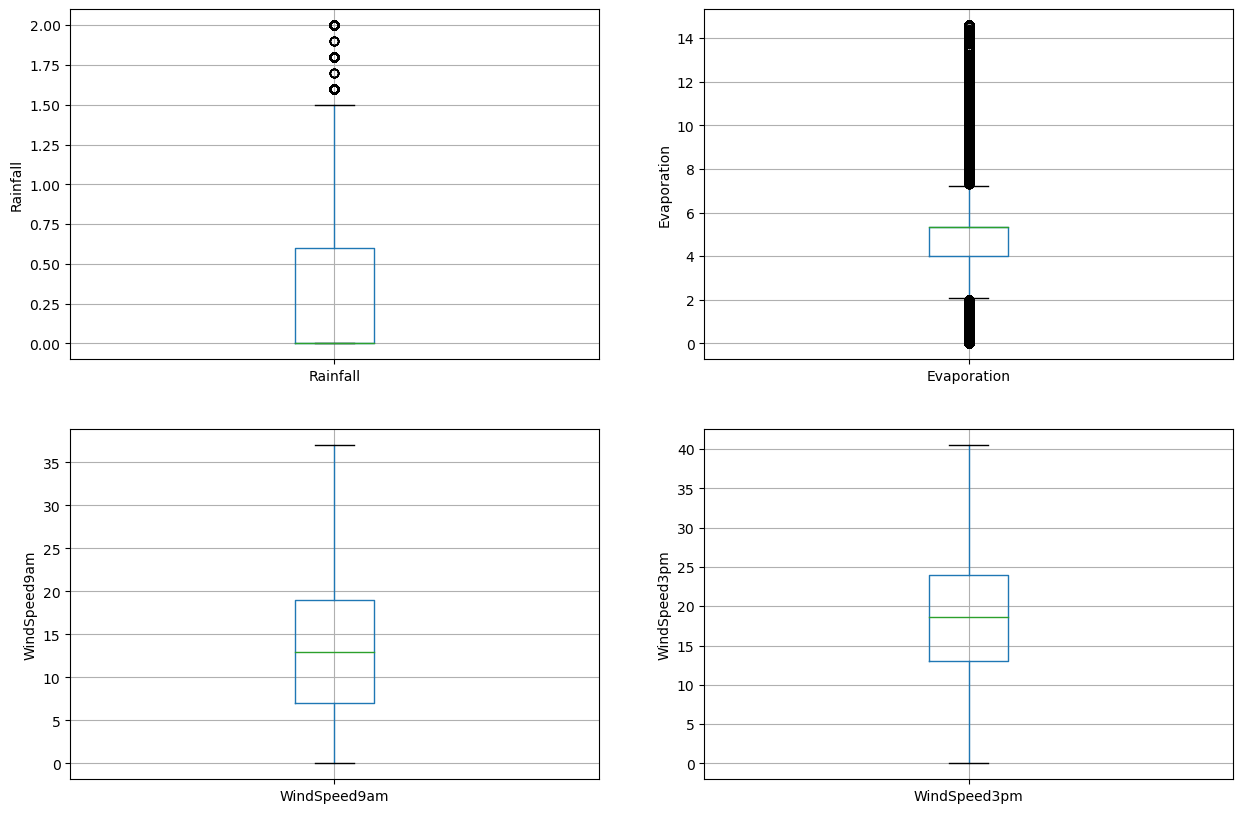

In [30]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

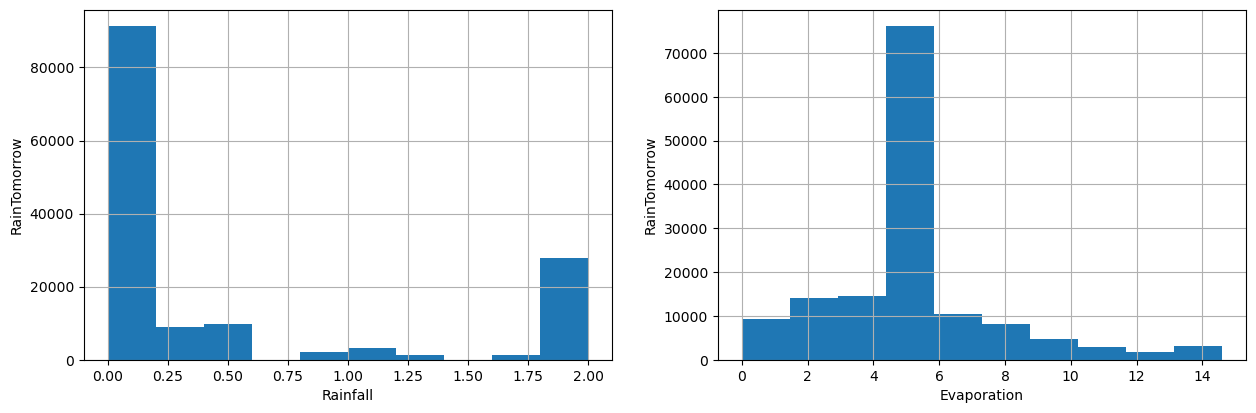

In [31]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

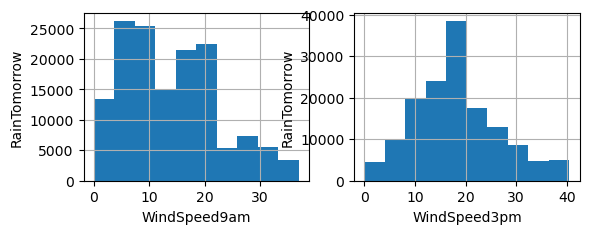

In [32]:
plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [33]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [34]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Evaporation outliers are values < 0.04399903229708624 or > 9.274667956937218


In [35]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [36]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [37]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [38]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
X_train.shape, X_test.shape

((116368, 25), (29092, 25))

In [40]:
X_train.dtypes

Unnamed: 0         int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [41]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [42]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Unnamed: 0',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [43]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Unnamed: 0       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [44]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Unnamed: 0       0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [45]:
X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [46]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [47]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(2.0, 2.0)

In [48]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(14.6, 14.6)

In [49]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(37.0, 37.0)

In [50]:
X_train[numerical].describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,72628.036281,12.192361,23.212107,0.488372,5.314438,7.603554,39.856502,13.955266,18.594877,68.981364,51.591578,1017.665673,1015.264901,4.451391,4.510447,16.984261,21.674461,2012.767058,6.395091,15.731954
std,41972.901911,6.366054,7.066309,0.784334,2.570216,2.732316,12.518236,8.557959,8.443581,18.663514,20.439879,6.651054,6.603434,2.265153,2.092264,6.441481,6.819830,2.538401,3.425451,8.796931
min,0.000000,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,2007.000000,1.000000,1.000000
25%,36328.500000,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,72494.500000,12.100000,22.700000,0.000000,5.318667,7.611178,39.000000,13.000000,18.574162,69.000000,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.800000,21.300000,2013.000000,6.000000,16.000000
75%,109023.250000,16.800000,28.200000,0.600000,5.318667,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,145459.000000,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,8.000000,35.550000,41.100000,2017.000000,12.000000,31.000000


In [51]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [52]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [56]:
X_train.head()

,Unnamed: 0,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,22926,NorfolkIsland,18.8,23.7,0.2,5.000000,7.300000,ESE,52.0,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,80735,Watsonia,9.3,24.0,0.2,1.600000,10.900000,NE,48.0,NNW,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,121764,Perth,10.9,22.2,1.4,1.200000,9.600000,SW,26.0,N,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,139821,Darwin,19.3,29.9,0.0,9.200000,11.000000,ESE,43.0,ESE,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,1867,Albury,15.7,17.6,2.0,5.318667,7.611178,E,20.0,ESE,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [60]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [61]:
X_train.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,22926,18.8,23.7,0.2,5.000000,7.300000,52.0,31.0,28.0,74.0,...,0,0,0,0,0,0,0,0,0,0
80735,80735,9.3,24.0,0.2,1.600000,10.900000,48.0,13.0,24.0,74.0,...,0,0,0,0,0,0,0,0,0,0
121764,121764,10.9,22.2,1.4,1.200000,9.600000,26.0,0.0,11.0,85.0,...,0,0,0,0,0,0,1,0,0,0
139821,139821,19.3,29.9,0.0,9.200000,11.000000,43.0,26.0,17.0,44.0,...,0,0,0,0,0,0,0,0,0,0
1867,1867,15.7,17.6,2.0,5.318667,7.611178,20.0,11.0,13.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [63]:
X_test.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,138175,21.9,39.4,1.6,11.200000,11.500000,57.0,20.0,33.0,50.0,...,0,0,0,0,0,0,0,0,0,0
38638,38638,20.5,37.5,0.0,9.200000,8.400000,59.0,17.0,20.0,47.0,...,0,0,0,0,0,0,0,0,0,0
124058,124058,5.1,17.2,0.2,5.318667,7.611178,50.0,28.0,22.0,68.0,...,0,0,0,0,0,0,0,1,0,0
99214,99214,11.9,16.8,1.0,5.318667,7.611178,28.0,11.0,13.0,80.0,...,0,0,0,0,0,0,1,0,0,0
25097,25097,7.5,21.3,0.0,5.318667,7.611178,15.0,2.0,7.0,88.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_train.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,72628.036281,12.192361,23.212107,0.488372,5.314438,7.603554,39.856502,13.955266,18.594877,68.981364,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,41972.901911,6.366054,7.066309,0.784334,2.570216,2.732316,12.518236,8.557959,8.443581,18.663514,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36328.500000,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72494.500000,12.100000,22.700000,0.000000,5.318667,7.611178,39.000000,13.000000,18.574162,69.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109023.250000,16.800000,28.200000,0.600000,5.318667,8.600000,46.000000,19.000000,24.000000,83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,145459.000000,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
cols = X_train.columns

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [67]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [68]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [69]:
X_train.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.499302,0.498451,0.503935,0.244186,0.364003,0.524383,0.501578,0.377169,0.459133,0.621724,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.288555,0.171130,0.171512,0.392167,0.176042,0.188436,0.185455,0.231296,0.208483,0.227604,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249751,0.377688,0.377427,0.000000,0.273973,0.524909,0.370370,0.189189,0.320988,0.475610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498384,0.495968,0.491505,0.000000,0.364292,0.524909,0.488889,0.351351,0.458621,0.621951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.749512,0.622312,0.625000,0.300000,0.364292,0.593103,0.592593,0.513514,0.592593,0.792683,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [71]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [72]:
logreg.predict_proba(X_test)[:,0]

array([0.80244226, 0.71895486, 0.79387892, ..., 0.44232363, 0.64543193,
       0.9683836 ])

In [73]:
logreg.predict_proba(X_test)[:,1]

array([0.19755774, 0.28104514, 0.20612108, ..., 0.55767637, 0.35456807,
       0.0316164 ])

In [74]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8482


In [75]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [76]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8487


In [77]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8487
Test set score: 0.8482


In [78]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [79]:
# print the scores on training and test set Checking for Overfitting and underfitting
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8433
Test set score: 0.8423


In [80]:
y_test.value_counts()

No     22726
Yes     6366
Name: RainTomorrow, dtype: int64

In [81]:
null_accuracy = (22726/(22726+6366))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7812


In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21522  1204]
 [ 3211  3155]]

True Positives(TP) =  21522

True Negatives(TN) =  3155

False Positives(FP) =  1204

False Negatives(FN) =  3211


<Axes: >

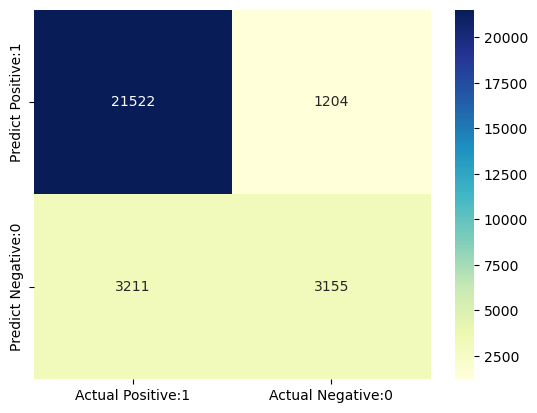

In [83]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.72      0.50      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [86]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [87]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8482


In [88]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1518


In [89]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9470


In [90]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8702


In [91]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8702


In [92]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2762


In [99]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8680
